In [535]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Feature Description

ph: pH of 1. water (0 to 14).

Hardness: Capacity of water to precipitate soap in mg/L. (경도)

Solids: Total dissolved solids in ppm.    (고형물)

Chloramines: Amount of Chloramines in ppm. (클로라민)

Sulfate: Amount of Sulfates dissolved in mg/L. (황산)

Conductivity: Electrical conductivity of water in μS/cm. (전도)

Organic_carbon: Amount of organic carbon in ppm. (유기물)

Trihalomethanes: Amount of Trihalomethanes in μg/L. (트라이할로메테인)

Turbidity: Measure of light emiting property of water in NTU. (탁함)

Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0 (식수)

In [644]:
data=pd.read_csv('data/water_potability.csv')
data=pd.DataFrame(data)

In [645]:
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [646]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


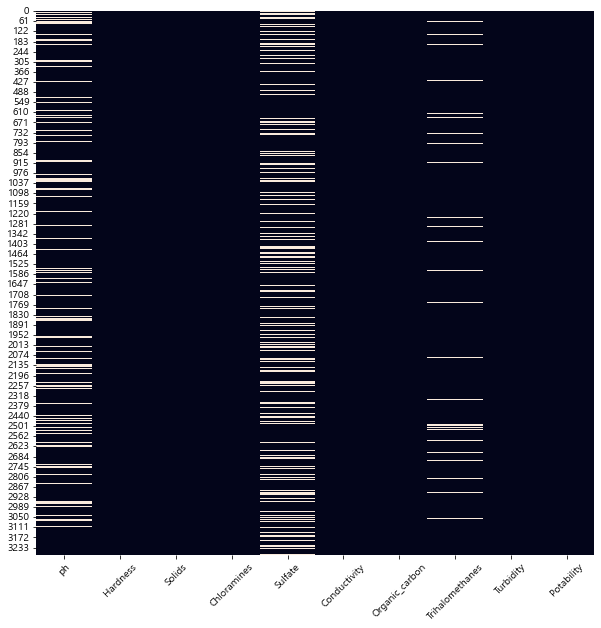

In [647]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(), cbar=False)
plt.xticks(rotation=45)
plt.show()

In [648]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [649]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

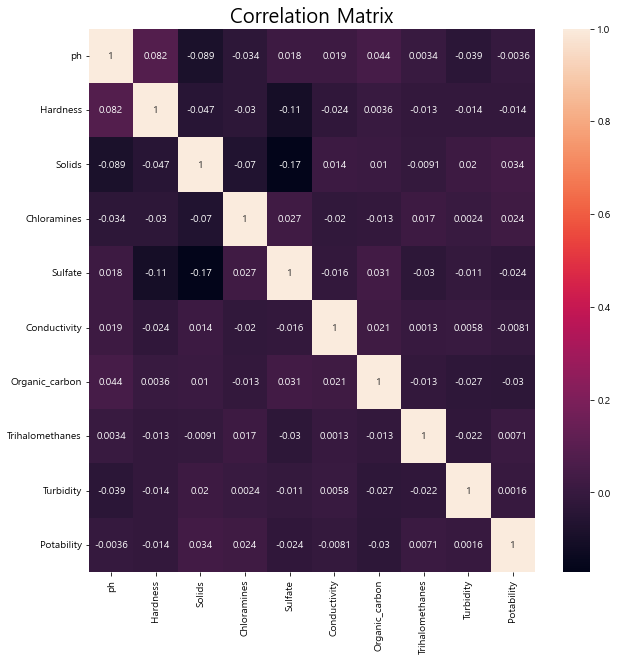

In [650]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=20);

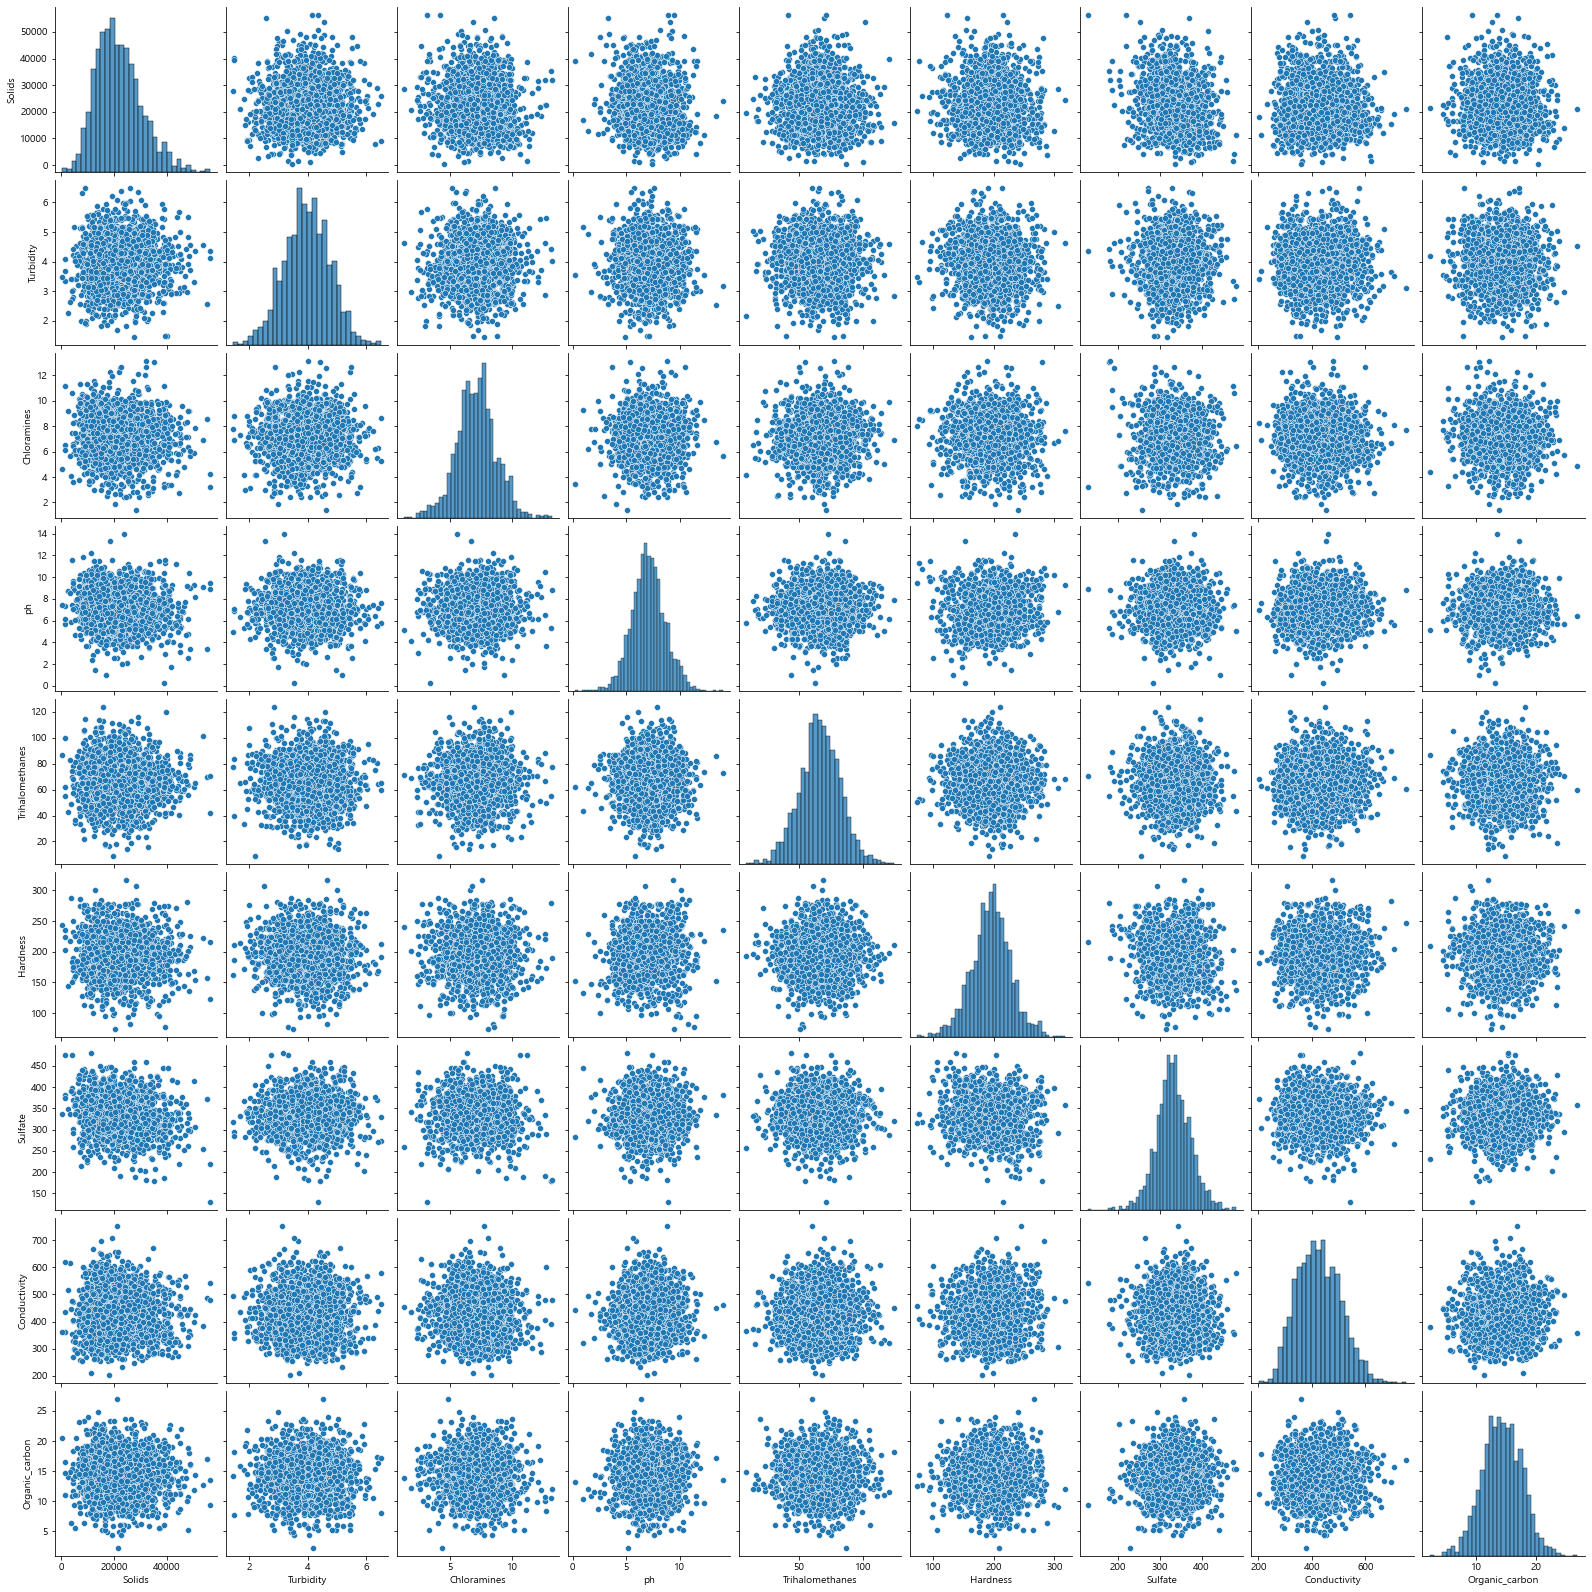

In [652]:
data= data.dropna()
cols = ['Solids', 'Turbidity', 'Chloramines', 'ph','Trihalomethanes','Hardness','Sulfate'
        ,'Conductivity','Organic_carbon']
sns.pairplot(data[cols])

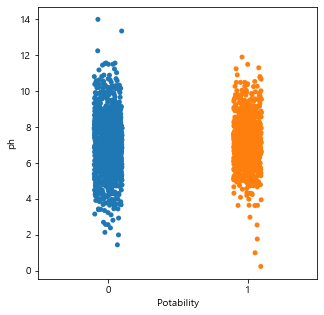

In [653]:
fig=plt.figure(figsize=(5,5))
sns.stripplot(y=data['ph'], x=data['Potability'])
plt.show()

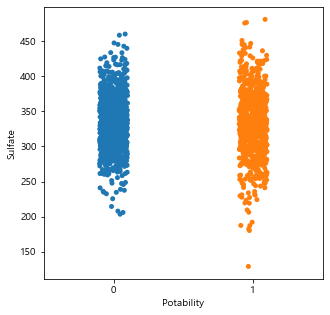

In [654]:
fig=plt.figure(figsize=(5,5))
sns.stripplot(y=data['Sulfate'], x=data['Potability'])
plt.show()

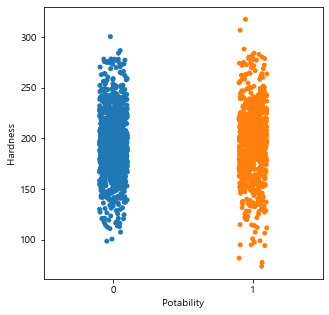

In [655]:
fig=plt.figure(figsize=(5,5))
sns.stripplot(y=data['Hardness'], x=data['Potability'])
plt.show()

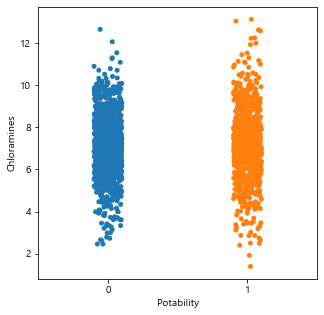

In [656]:
fig=plt.figure(figsize=(5,5))
sns.stripplot(y=data['Chloramines'], x=data['Potability'])
plt.show()

<Figure size 720x360 with 0 Axes>

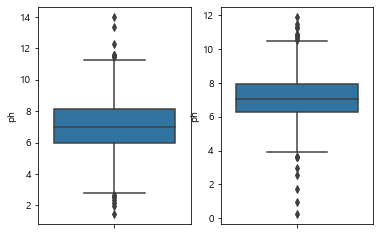

In [657]:
a=data.loc[data['Potability'] == 0, 'ph']
b=data.loc[data['Potability'] == 1, 'ph']
fig=plt.figure(figsize=(10,5))
fig, axes = plt.subplots(1, 2)
sns.boxplot(y=a, ax=axes[0])
sns.boxplot(y=b, ax=axes[1])
plt.show()

<Figure size 720x360 with 0 Axes>

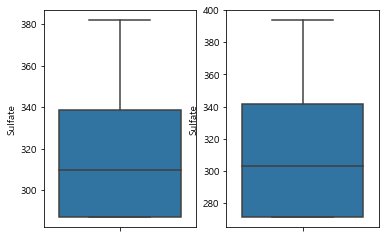

In [1236]:
a=data.loc[data['Potability'] == 0, 'Sulfate']
b=data.loc[data['Potability'] == 1, 'Sulfate']
fig=plt.figure(figsize=(10,5))
fig, axes = plt.subplots(1, 2)
sns.boxplot(y=a, ax=axes[0])
sns.boxplot(y=b, ax=axes[1])
plt.show()

<Figure size 720x360 with 0 Axes>

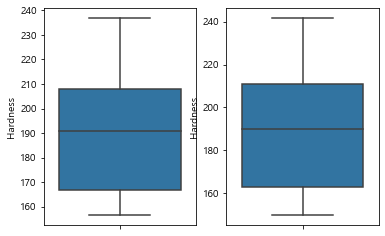

In [1237]:
a=data.loc[data['Potability'] == 0, 'Hardness']
b=data.loc[data['Potability'] == 1, 'Hardness']
fig=plt.figure(figsize=(10,5))
fig, axes = plt.subplots(1, 2)
sns.boxplot(y=a, ax=axes[0])
sns.boxplot(y=b, ax=axes[1])
plt.show()

<Figure size 720x360 with 0 Axes>

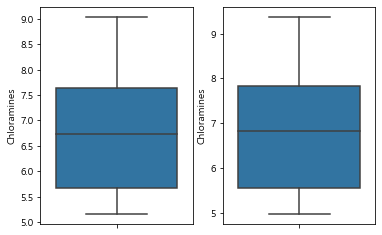

In [1238]:
a=data.loc[data['Potability'] == 0, 'Chloramines']
b=data.loc[data['Potability'] == 1, 'Chloramines']
fig=plt.figure(figsize=(10,5))
fig, axes = plt.subplots(1, 2)
sns.boxplot(y=a, ax=axes[0])
sns.boxplot(y=b, ax=axes[1])
plt.show()

# 결측치 처리(ph, Sulfate, Trihalomethanes)

- 1. dropna(null값을 포함한 데이터는 drop한다) => 데이터가 1526개로 약 절반가량으로 줄어든다.=> RandomForest 정확도가 상대적으로 낮다
- 2. null값이 있는 column을 drop한다.=> feature가 9개에서 6개로 줄어든다.=> RamdomForest 정확도가 상대적으로 낮다
- 3. Feature의 평균값 또는 중앙값으로 대체한다.=> RandomForest 정확도가 상대적으로 높다.

In [1239]:
# 결측치 평균값으로 대체-1

from sklearn.preprocessing import StandardScaler
data=pd.read_csv('data/water_potability.csv')


col = data.columns

notpotable  = data[data['Potability']==0]
potable = data[data['Potability']==1]

scaler = StandardScaler()

std = 1.3                   ##### 이상치  Z-score 표준편차

In [1240]:
cols = ['Solids', 'Turbidity', 'Chloramines', 'ph','Trihalomethanes','Hardness','Sulfate'
        ,'Conductivity','Organic_carbon']



In [1241]:
cols = ['Solids', 'Turbidity', 'Chloramines', 'ph','Trihalomethanes','Hardness','Sulfate'
        ,'Conductivity','Organic_carbon']



In [1242]:
notpotable_scaled = scaler.fit_transform(notpotable)
potable_scaled = scaler.fit_transform(potable)

potable_scaled = pd.DataFrame(potable_scaled,columns = col)
notpotable_scaled = pd.DataFrame(notpotable_scaled,columns = col)


potable_outlier =  abs(potable_scaled) >=std
notpotable_outlier =  abs(notpotable_scaled) >=std

potable_outlier

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,True,True,False,True,False,True,True,False,False,False
1,True,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False
3,False,True,True,True,True,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
1273,True,False,True,False,False,False,False,False,False,False
1274,False,False,False,False,False,False,True,False,True,False
1275,True,False,False,False,False,False,False,False,False,False
1276,True,False,False,False,False,False,False,False,False,False


In [1243]:
potable_outlier= potable_outlier.replace(True,np.NaN)
potable_outlier =potable_outlier.replace(False,0)

notpotable_outlier= notpotable_outlier.replace(True,np.NaN)
notpotable_outlier =notpotable_outlier.replace(False,0)

potable_outlier

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0
1,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0
3,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1273,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0
1274,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0
1275,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1276,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [1244]:
potable_scaled = potable_scaled*0
potable_outlier = potable_scaled*0+potable_outlier

notpotable_scaled = notpotable_scaled*0
notpotable_outlier = notpotable_scaled*0+notpotable_outlier

notpotable_outlier

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
1,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1993,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1994,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
1996,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [1245]:
potable = potable.reset_index()
notpotable = notpotable.reset_index()

potable = potable.drop(columns=['index'], axis = 1) + potable_outlier
notpotable = notpotable.drop(columns=['index'], axis = 1) +notpotable_outlier

potable.isnull().sum()

ph                 385
Hardness           211
Solids             234
Chloramines        231
Sulfate            466
Conductivity       247
Organic_carbon     245
Trihalomethanes    277
Turbidity          248
Potability           0
dtype: int64

In [1246]:
from sklearn.utils import shuffle
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer,SimpleImputer
  

col = data.columns


imputer = SimpleImputer(strategy='most_frequent')

potable_imp =imputer.fit_transform(potable)
notpotable_imp =imputer.fit_transform(notpotable) 

potable_imp = pd.DataFrame(potable_imp,columns = col)
notpotable_imp= pd.DataFrame(notpotable_imp,columns = col)

potable_imp

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,5.204939,149.768744,13168.529156,4.964449,310.583374,319.842930,9.921623,77.577460,3.875165,1.0
1,5.204939,149.768744,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1.0
2,5.204939,169.974849,23403.637304,8.519730,271.097104,475.573562,12.924107,50.861913,2.954093,1.0
3,6.800119,149.768744,10643.186771,4.964449,271.097104,376.456593,11.432466,73.777275,3.854940,1.0
4,7.174135,203.408935,20401.102461,7.681806,287.085679,319.842930,14.533510,74.405616,3.939896,1.0
...,...,...,...,...,...,...,...,...,...,...
1273,5.204939,193.681735,10643.186771,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1.0
1274,7.808856,193.553212,17329.802160,8.061362,271.097104,392.449580,9.921623,45.428097,2.954093,1.0
1275,5.204939,175.762646,33155.578218,7.350233,271.097104,432.044783,11.039070,69.845400,3.298875,1.0
1276,5.204939,230.603758,11983.869376,6.303357,271.097104,402.883113,11.168946,77.488213,4.708658,1.0


In [1247]:
data = pd.concat([notpotable_imp,potable_imp])
data = data.reset_index()



data = data.drop(columns=['index'], axis = 1)

data = shuffle(data)

In [1248]:
data
cols = ['Solids', 'Turbidity', 'Chloramines', 'ph','Trihalomethanes','Hardness','Sulfate'
        ,'Conductivity','Organic_carbon']



In [1249]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.4, random_state=0)

In [1250]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1965, 9), (1965,), (1311, 9), (1311,))

### Preprocessing

In [1251]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Machine Learning
- Modeling

In [1252]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1965, 9), (1311, 9), (1965,), (1311,))

In [1253]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
                            ,PrecisionRecallDisplay,average_precision_score,roc_auc_score,roc_curve)


models_acc = []
models_f1 = []
models = [DecisionTreeClassifier(), LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), GaussianNB(), SVC()]
for model in models:
    model.fit(X_train_scaled , y_train)    
    pred = model.predict(X_test_scaled)
    models_acc.append(accuracy_score(y_test, pred))
    models_f1.append(f1_score(y_test, pred))

In [1254]:
Model_list = pd.DataFrame({
    'Model Accuracy': models_acc, 
    "Model Name": ['DecisionTreeClassifier','LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'SVC'],
    "Model f1 score": models_f1
})
Model_list

,Model Accuracy,Model Name,Model f1 score
0,0.937452,DecisionTreeClassifier,0.919450
1,0.613272,LogisticRegression,0.000000
2,0.618612,KNeighborsClassifier,0.399038
3,0.961861,RandomForestClassifier,0.948560
4,0.698703,GaussianNB,0.425036
5,0.745995,SVC,0.596364


### Randomsearch

In [1255]:
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators':[300,400,500],
    'max_depth':[10,20,30,40],
    'criterion': ['entropy','gini'],
    'max_features':[2,3,4,5,6],
    'min_samples_leaf':[2,3,4,5]
}

random_search = RandomizedSearchCV(rfc, 
                           param_distributions=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

In [1157]:
random_search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40],
                                        'max_features': [2, 3, 4, 5, 6],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'n_estimators': [300, 400, 500]},
                   scoring='accuracy')

In [1047]:
random_search.best_params_

{'n_estimators': 500,
 'min_samples_leaf': 2,
 'max_features': 3,
 'max_depth': 40,
 'criterion': 'gini'}

In [1158]:
best_model = random_search.best_estimator_
accuracy_score(y_test, best_model.predict(X_test_scaled))

0.958047292143402

In [1159]:
pred=best_model.predict(X_test_scaled)


pred_train = best_model.predict(X_train_scaled)
pred_test = best_model.predict(X_test_scaled)



pred_train_proba = best_model.predict_proba(X_train_scaled)[:, 1]
pred_test_proba = best_model.predict_proba(X_test_scaled)[:, 1]


ap_train = average_precision_score(y_train, pred_train_proba)
ap_test = average_precision_score(y_test, pred_test_proba)

In [1160]:
print("Accuracy:", accuracy_score(y_test, pred)*100,'%') 
print("Recall:", recall_score(y_test, pred)*100,'%') 
print('Precision:',precision_score(y_test, pred)*100, '%') 
print('f1 score:',f1_score(y_test, pred)*100, '%')

Accuracy: 95.8047292143402 %
Recall: 90.2390438247012 %
Precision: 98.69281045751634 %
f1 score: 94.27679500520291 %


In [1161]:
precision_train, recall_train, _ = precision_recall_curve(y_train, pred_train_proba)
precision_test, recall_test, _ = precision_recall_curve(y_test, pred_test_proba)

auc_train = roc_auc_score(y_train, pred_train_proba)
auc_test = roc_auc_score(y_test, pred_test_proba)

fpr_train, tpr_train, _ = roc_curve(y_train, pred_train_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, pred_test_proba)

print(auc_train, auc_test)

0.9998200861852201 0.9950630112430378


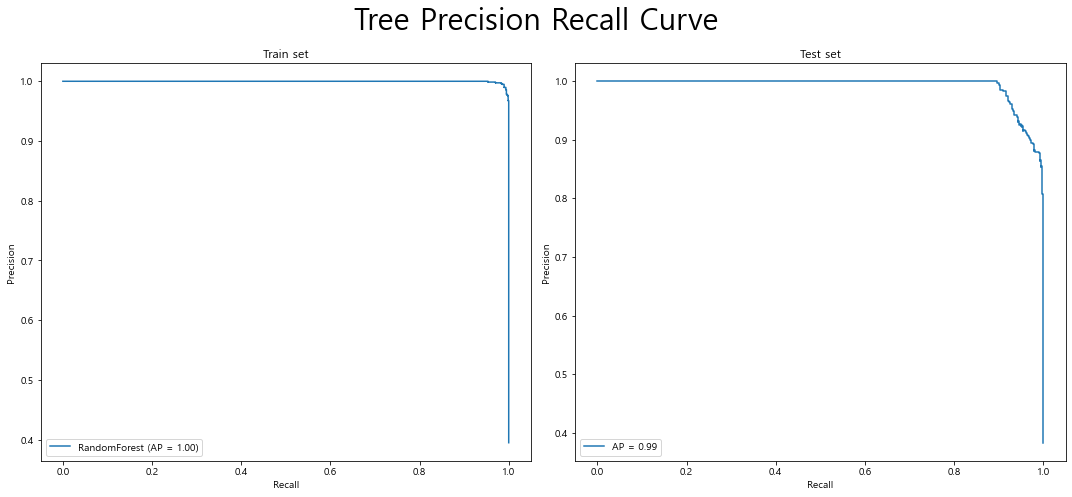

In [1162]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
fig.suptitle('Tree Precision Recall Curve', fontsize=30)

disp_pr1 = PrecisionRecallDisplay(precision_train, recall_train, average_precision=ap_train, estimator_name='RandomForest')
disp_pr1.plot(ax=axes[0])
axes[0].set_title('Train set')

disp_pr2 = PrecisionRecallDisplay(precision_test, recall_test, average_precision=ap_test)
disp_pr2.plot(ax=axes[1])
axes[1].set_title('Test set')

plt.tight_layout()
plt.show()

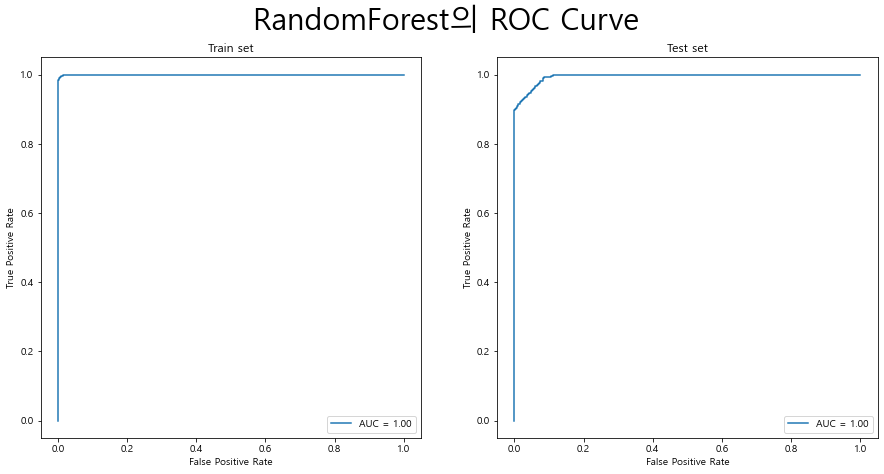

In [1163]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
fig.suptitle('RandomForest의 ROC Curve', fontsize=30)

disp_roc1 = RocCurveDisplay(fpr=fpr_train, tpr=tpr_train, roc_auc=auc_train)
disp_roc1.plot(ax=axes[0])
axes[0].set_title('Train set')

disp_roc2 = RocCurveDisplay(fpr=fpr_test, tpr=tpr_test, roc_auc=auc_test)
disp_roc2.plot(ax=axes[1])
axes[1].set_title('Test set')

plt.show()

In [1164]:
fi=best_model.feature_importances_
fi=pd.Series(fi[:], index=X_train.columns)
fi

ph                 0.205733
Hardness           0.059305
Solids             0.044645
Chloramines        0.038869
Sulfate            0.324409
Conductivity       0.089442
Organic_carbon     0.070737
Trihalomethanes    0.105898
Turbidity          0.060962
dtype: float64

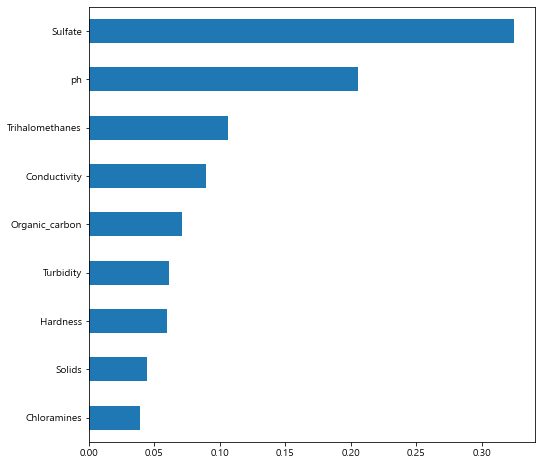

In [1165]:
fi.sort_values().plot(kind='barh', figsize=(8,8))
plt.show()

# =====================================

## 딥러닝

In [1166]:
import tensorflow as tf
from tensorflow import keras


In [1167]:
# 하이퍼파라미터 - 튜닝대상 (변경될 가능이 높은 변수) => 한군데 몰아서 선언하는 것이 좋다.
LEARNING_RATE = 0.01  # 학습률
N_EPOCHS  = 150        # epoch수: traindataset을 몇번 학습할지 횟수.
N_BATCHS = 10          # batch size: 1 step당 몇개의 데이터를 학습할지 (2의 거듭제곱한 값)

N_TRAIN = X_train.shape[0]
N_VAL = X_val.shape[0]
N_TEST = X_test.shape[0]

In [1168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train, random_state=2)
X_train.shape, X_val.shape, X_test.shape

((1375, 9), (590, 9), (1311, 9))

In [1169]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [1170]:
# train set을 위한 dataset을 생성

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).shuffle(N_TRAIN).batch(N_BATCHS, drop_remainder=True)
            # shuffle -> epoch단위로 shuffle을 실행.
            # batch size설정. Train set 에서는 보통 drop_remainder=True로 설정. 각 step마다 동일 개수의 데이터셋을 학습하도록 하기 위해.

# validation dataset -> 학습하는 도중에 검증데이터로 사용할 dataset 
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCHS)    
# 최종 평가시 사용할 데이터셋
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCHS) 
# test set의 batch_size : 전체 데이터를 묶어서 검증하는 것이 아니라 batch_size 개수별로 검증해서 그 평균을 최종 평가 결과로 반환.



In [1231]:
from tensorflow.keras.models import Sequential
def create_water_model():
    model = keras.Sequential()
    #     1. Input Layer
    #     model.add(layers.InputLayer((13, )))  #Input Layer 추가 1. -> InputLayer생성=>Feature shape을 지정
    # Input Layer 추가 2 -> 첫번째 hidden layer추가하면서 input_shape 속성에 Feature에 shape을 지정
    
    #     2. Hidden layer 추가.
    #  DenseLayer: units - unit의 개수, activation: 활성함수
    #  DenseLayer의 unit수는 점점 개수를 줄여나간다.(관례적으로), 

    model.add(layers.Dense(units=128, activation='elu', input_shape=(9,)))
    model.add(layers.Dense(units=64, activation='elu'))
    model.add(layers.Dense(units=32, activation='elu'))
    model.add(layers.Dense(units=16, activation='elu'))
    model.add(layers.Dense(units=8, activation='LeakyReLU'))
    model.add(layers.Dense(units=4, activation='LeakyReLU'))
    model.add(layers.Dense(units=1, activation='sigmoid', name='Output_layer'))
    
    #     3. Output Layer 추가
    #    회귀문제에대한 output layer  - units: 추론한 결과값(정답)에 개수에 맞춘다. - 집값1개 (unit=1), activation=None(기본): 지정하지 않는다.

    return model

In [1232]:
from tensorflow.keras import layers
# 모델생성
# 모델 컴파일 - 모델을 학습할 수 있게 만들어 준다. => 모델에 optimizer와 loss함수를 추가.
# 회귀문제를 위한 모델 컴파일 -> loss: mse(mean squared error)
# optimizer=옵티마이저 객체-learning rate등 설정을 할경우., 문자열-기본설정을 사용할 경우. ("adam")
model = create_water_model()
model.compile(optimizer=keras.optimizers.SGD(learning_rate=LEARNING_RATE), 
              loss='squared_hinge',
              metrics=['accuracy'])

In [1233]:
# 모델.fit() : 반환 - History: 학습한 내역(epoch별 검증결과)를 묶어서 제공.
hist = model.fit(train_dataset, epochs=N_EPOCHS, validation_data=val_dataset)
# Dataset을 이용해서 학습할 경우 validatation_split을 사용할 수 없다.

Epoch 1/150
137/137 [==============================] - 1s 3ms/step - loss: 1.2897 - accuracy: 0.5861 - val_loss: 1.1404 - val_accuracy: 0.6102
Epoch 2/150
137/137 [==============================] - 0s 2ms/step - loss: 1.0786 - accuracy: 0.6102 - val_loss: 1.0427 - val_accuracy: 0.6102
Epoch 3/150
137/137 [==============================] - 0s 2ms/step - loss: 1.0258 - accuracy: 0.6102 - val_loss: 1.0182 - val_accuracy: 0.6102
Epoch 4/150
137/137 [==============================] - 0s 2ms/step - loss: 1.0123 - accuracy: 0.6095 - val_loss: 1.0105 - val_accuracy: 0.6102
Epoch 5/150
137/137 [==============================] - 0s 2ms/step - loss: 1.0075 - accuracy: 0.6102 - val_loss: 1.0069 - val_accuracy: 0.6102
Epoch 6/150
137/137 [==============================] - 0s 2ms/step - loss: 1.0050 - accuracy: 0.6088 - val_loss: 1.0050 - val_accuracy: 0.6102
Epoch 7/150
137/137 [==============================] - 0s 2ms/step - loss: 1.0037 - accuracy: 0.6095 - val_loss: 1.0039 - val_accuracy: 0.6102

Epoch 58/150
137/137 [==============================] - 0s 2ms/step - loss: 1.0000 - accuracy: 0.6095 - val_loss: 1.0000 - val_accuracy: 0.6102
Epoch 59/150
137/137 [==============================] - 0s 2ms/step - loss: 0.9999 - accuracy: 0.6088 - val_loss: 1.0000 - val_accuracy: 0.6102
Epoch 60/150
137/137 [==============================] - 0s 2ms/step - loss: 0.9999 - accuracy: 0.6080 - val_loss: 1.0000 - val_accuracy: 0.6102
Epoch 61/150
137/137 [==============================] - 0s 2ms/step - loss: 0.9999 - accuracy: 0.6102 - val_loss: 0.9999 - val_accuracy: 0.6102
Epoch 62/150
137/137 [==============================] - 0s 2ms/step - loss: 0.9998 - accuracy: 0.6080 - val_loss: 0.9999 - val_accuracy: 0.6102
Epoch 63/150
137/137 [==============================] - 0s 2ms/step - loss: 0.9998 - accuracy: 0.6080 - val_loss: 0.9998 - val_accuracy: 0.6102
Epoch 64/150
137/137 [==============================] - 0s 2ms/step - loss: 0.9997 - accuracy: 0.6095 - val_loss: 0.9997 - val_accuracy:

Epoch 115/150
137/137 [==============================] - 0s 2ms/step - loss: 0.8465 - accuracy: 0.7635 - val_loss: 0.8265 - val_accuracy: 0.7847
Epoch 116/150
137/137 [==============================] - 0s 2ms/step - loss: 0.8452 - accuracy: 0.7657 - val_loss: 0.8251 - val_accuracy: 0.7847
Epoch 117/150
137/137 [==============================] - 0s 2ms/step - loss: 0.8449 - accuracy: 0.7650 - val_loss: 0.8257 - val_accuracy: 0.7814
Epoch 118/150
137/137 [==============================] - 0s 2ms/step - loss: 0.8447 - accuracy: 0.7650 - val_loss: 0.8252 - val_accuracy: 0.7847
Epoch 119/150
137/137 [==============================] - 0s 2ms/step - loss: 0.8442 - accuracy: 0.7679 - val_loss: 0.8252 - val_accuracy: 0.7847
Epoch 120/150
137/137 [==============================] - 0s 2ms/step - loss: 0.8462 - accuracy: 0.7642 - val_loss: 0.8250 - val_accuracy: 0.7831
Epoch 121/150
137/137 [==============================] - 0s 2ms/step - loss: 0.8476 - accuracy: 0.7628 - val_loss: 0.8255 - val_ac

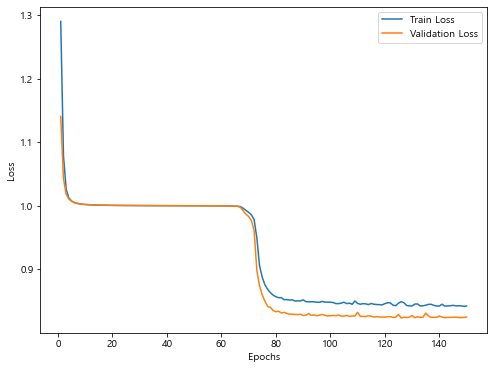

In [1234]:
plt.figure(figsize=(8,6))
plt.plot(range(1,N_EPOCHS+1), hist.history['loss'], label='Train Loss')
plt.plot(range(1,N_EPOCHS+1), hist.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
plt.show()

In [1235]:
loss = model.evaluate(test_dataset)
print(loss, np.sqrt(loss))

132/132 [==============================] - 0s 1ms/step - loss: 0.8454 - accuracy: 0.7643
[0.8453765511512756, 0.7643020749092102] [0.91944361 0.87424372]
